# What is Supervised Learning?

Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output.

Y = f(X)

The goal is to approximate the mapping function so well that when you have new input data (x) that you can predict the output variables (Y) for that data.

# What is Regression?

Regression searches for relationships among variables.

For example, you can observe several employees of some company and try to understand how their salaries depend on the features, such as experience, level of education, role, city they work in, and so on.

In [30]:
#Imprting Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
#Reading the CSV file
data = pd.read_csv(r'C:\Users\Ram\The Sparks Foundation\data.csv')

In [15]:
#Shape of the data
print(data.shape)
print("There are {} rows and {} columns".format(data.shape[0],data.shape[1]))

(25, 2)
There are 25 rows and 2 columns


In [6]:
#Info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
#Describing the Data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#Data File
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


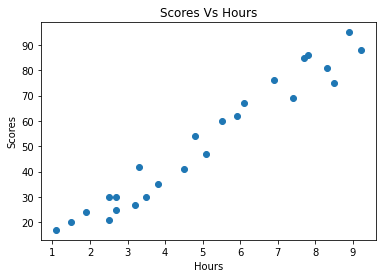

In [20]:
#Creating a plot
X = list(data['Hours'])
y=list(data['Scores'])
plt.plot(x,y,'o')
plt.title('Scores Vs Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

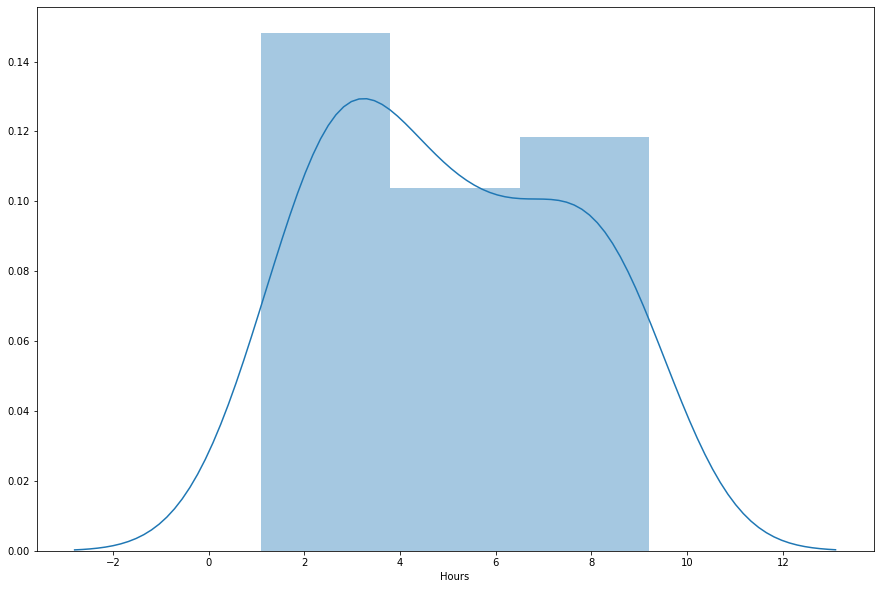

In [23]:
#Creating Another plot
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data['Hours'])

In [57]:
#Dividing data into attributes and labels
X = data['Hours'].values.reshape(-1,1)
y = data['Scores'].values.reshape(-1,1)
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


In [58]:
#Splitting the Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [59]:
#Training our model
regressor = LinearRegression()
regressor.fit(X_train,y_train)

#To retrieve the intercept and coefficient
print(regressor.intercept_)
print(regressor.coef_)

[2.01816004]
[[9.91065648]]


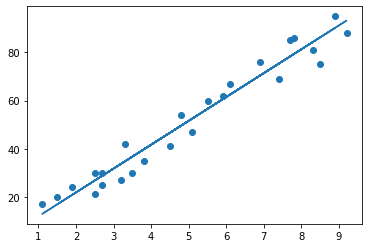

In [60]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [61]:
#Making the prediction
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [68]:
#Comparing Actual Vs Predicted

df = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [77]:
hours = [[9.25]]
one_pred = regressor.predict(hours)
print("No of Hours {}".format(hours[0][0]))
print("Predicted Score = {}".format(one_pred[0][0]))


No of Hours 9.25
Predicted Score = 93.69173248737538


In [81]:
#Evaluation of the model
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.18385989900298
